## **Business Case Study: Netflix**

### Problem statement
To analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [145]:
#Let's import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
#Let's read the dataset
data = pd.read_csv('/content/drive/MyDrive/working files/BS_Case_netflix_data.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### **Basic Analysis**

In [148]:
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [149]:
data.shape

(8807, 12)

8807 rows and 12 columns are present in the dataset.

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* It can be found that the columns director,cast,country, date_added have value
less than the number of rows, i.e.,8807,which means that there exists null values.
* All the features are of the data type "object" except release_year which is an integer(int)



In [151]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


data.describe() gave the description of the numerical column.

In [152]:
data.describe(include = 'object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


data.describe(include = 'object') gave the description of the categorical column.

Check for NULL Values

In [153]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [154]:
data.isnull().sum()/len(data)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


The below code is executed in parts for a better clarity of the steps involved:
constraint=data['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_cast=pd.DataFrame(constraint,index=data['title'])
df_cast=df_new.stack()
df_cast=pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast=df_cast[['title',0]]
df_cast.columns=['title','cast']


### Un-nesting the columns:

Un-nesting the columns those have cells with multiple comma separated values within a column by creating multiple rows

In [155]:
constraint_cast=data['cast'].apply(lambda x: str(x).split(', ')).tolist()
constraint_cast

[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['nan'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Ba

In [156]:
df_cast=pd.DataFrame(constraint_cast,index=data['title'])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [157]:
df_cast=df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64951, dtype: object

In [158]:
df_cast.head(25)

title                   
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                      4         Dillon Windvogel
                      5          Natasha Thahane
                      6              Arno Greeff
                      7        Xolile Tshabalala
                      8          Getmore Sithole
                      9           Cindy Mahlangu
                      10           Ryle De Morny
                      11         Greteli Fincham
                      12    Sello Maake Ka-Ncube
                      13             Odwa Gwanya
                      14          Mekaila Mathys
                      15           Sandi Schultz
                      16          Duane Williams
                      17         Shamilla Miller
                      18        Patrick Mofo

In [159]:
df_cast=pd.DataFrame(df_cast)
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64951 rows x 1 columns]

In [160]:
df_cast.reset_index(inplace=True)
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [161]:
df_cast=df_cast[['title',0]]
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [162]:
df_cast.columns=['title','cast']
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [163]:
constraint_dir=data['director'].apply(lambda x: str(x).split(', ')).tolist()
df_dir=pd.DataFrame(constraint_dir,index=data['title'])
df_dir=df_dir.stack()
df_dir=pd.DataFrame(df_dir)
df_dir.reset_index(inplace=True)
df_dir=df_dir[['title',0]]
df_dir.columns=['title','director']

In [164]:
df_dir.head(25)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [165]:
constraint_country=data['country'].apply(lambda x: str(x).split(', ')).tolist()
df_country=pd.DataFrame(constraint_country,index=data['title'])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country=df_country[['title',0]]
df_country.columns=['title','country']

In [166]:
df_country.head(25)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


In [167]:
data.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [168]:
constraint_listed_in=data['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_listed_in=pd.DataFrame(constraint_listed_in,index=data['title'])
df_listed_in=df_listed_in.stack()
df_listed_in=pd.DataFrame(df_listed_in)
df_listed_in.reset_index(inplace=True)
df_listed_in=df_listed_in[['title',0]]
df_listed_in.columns=['title','listed_in']

In [169]:
df_listed_in.head(25)

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


In [170]:
data.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### Merging the un-nested columns

In [171]:
df_cast_merged_df_dir=df_cast.merge(df_dir, on='title', how='left')
df_cast_merged_df_dir
df_cast_merged_df_dir.head(60)

,title,cast,director
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan
5,Blood & Water,Dillon Windvogel,nan
6,Blood & Water,Natasha Thahane,nan
7,Blood & Water,Arno Greeff,nan
8,Blood & Water,Xolile Tshabalala,nan
9,Blood & Water,Getmore Sithole,nan


In [172]:
df_cast_merged_df_dir.shape #left join #is ran last not inner join code

(70812, 3)

In [173]:
df_cast_merged_df_dir.shape #inner join

(70812, 3)

In [174]:
#df_cast=data.reset_index().merge(df_dir, on='title', how='inner')
df_cast_merged_df_dir=df_cast.merge(df_dir, on='title', how='inner')
df_cast_merged_df_dir
df_cast_merged_df_dir.head(60)

,title,cast,director
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan
5,Blood & Water,Dillon Windvogel,nan
6,Blood & Water,Natasha Thahane,nan
7,Blood & Water,Arno Greeff,nan
8,Blood & Water,Xolile Tshabalala,nan
9,Blood & Water,Getmore Sithole,nan


In [175]:
df_cast_merged_df_dir_df_country=df_cast_merged_df_dir.merge(df_country, on='title', how='left')
df_cast_merged_df_dir_df_country
df_cast_merged_df_dir_df_country.head(75)

,title,cast,director,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States
1,Blood & Water,Ama Qamata,nan,South Africa
2,Blood & Water,Khosi Ngema,nan,South Africa
3,Blood & Water,Gail Mabalane,nan,South Africa
4,Blood & Water,Thabang Molaba,nan,South Africa
...,...,...,...,...
70,My Little Pony: A New Generation,Michael McKean,Robert Cullen,nan
71,My Little Pony: A New Generation,Michael McKean,José Luis Ucha,nan
72,My Little Pony: A New Generation,Phil LaMarr,Robert Cullen,nan
73,My Little Pony: A New Generation,Phil LaMarr,José Luis Ucha,nan


In [176]:
df_cast_merged_df_dir_df_country.shape

(89382, 4)

In [177]:
df_cast_merged_df_dir_df_country_df_listed_in=df_cast_merged_df_dir_df_country.merge(df_listed_in, on='title', how='left')
df_cast_merged_df_dir_df_country_df_listed_in
df_cast_merged_df_dir_df_country_df_listed_in.head(60)

,title,cast,director,country,listed_in
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows
5,Blood & Water,Khosi Ngema,nan,South Africa,TV Dramas
6,Blood & Water,Khosi Ngema,nan,South Africa,TV Mysteries
7,Blood & Water,Gail Mabalane,nan,South Africa,International TV Shows
8,Blood & Water,Gail Mabalane,nan,South Africa,TV Dramas
9,Blood & Water,Gail Mabalane,nan,South Africa,TV Mysteries


In [178]:
df_cast_merged_df_dir_df_country_df_listed_in.shape

(201991, 5)

In [179]:
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [180]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [181]:
data_leftover_col = data[['show_id', 'type','title','date_added','release_year', 'rating', 'duration','description']]
data_leftover_col

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Dragged from civilian life, a former superhero..."


In [182]:
data_leftover_col.shape

(8807, 8)

In [183]:
data_final=data_leftover_col.merge(df_cast_merged_df_dir_df_country_df_listed_in, on='title', how='right')
data_final.head(60)

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
5,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,TV Dramas
6,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,TV Mysteries
7,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan,South Africa,International TV Shows
8,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan,South Africa,TV Dramas
9,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan,South Africa,TV Mysteries


In [184]:
data_final.shape

(201991, 12)

In [185]:
data_final.columns

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'duration', 'description', 'cast', 'director', 'country', 'listed_in'],
      dtype='object')

In [186]:
#re-arranging the position of columns of 'data_final' as that of 'data'- the initial data set.
data_final = data_final[['show_id', 'type', 'title','director', 'cast','country','date_added', 'release_year', 'rating','duration','listed_in', 'description']]
data_final

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...



Thus un-nesting and merging of columns is done

## 2. Handling null values:
a. For categorical variables with null values,updating those rows as
'Unknown'.
b. Replacing with 0 for continuous variables having null values.

In [187]:
data_final.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      158
release_year      0
rating           67
duration          3
listed_in         0
description       0
dtype: int64

In [188]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      201991 non-null  object
 4   cast          201991 non-null  object
 5   country       201991 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [194]:
data_final = data_final.replace(to_replace= 'nan',value ='Unknown')
data_final.head(60)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


### All the categorical values with 'nan' have been replaced with 'Unknown' as part of null value handling.

In [195]:
data_final['release_year'].isnull().sum()

0

### 'release_year' is the only numerical variable in 'data_final' as of now and it shows no null values.

In [196]:
data_final.describe(include = object).T


,count,unique,top,freq
show_id,201991,8807,s7165,700
type,201991,2,Movie,145843
title,201991,8807,Kahlil Gibran's The Prophet,700
director,201991,4994,Unknown,50643
cast,201991,36440,Unknown,2146
country,201991,128,United States,59349
date_added,201833,1767,"January 1, 2020",3730
rating,201924,17,TV-MA,73867
duration,201988,220,1 Season,35035
listed_in,201991,42,Dramas,29775


## Exploratory Data Analysis

### 1. Finding the counts of each categorical variable both using graphical and nongraphical analysis.

In [197]:
data_final['type'].value_counts()

Movie      145843
TV Show     56148
Name: type, dtype: int64

In [198]:
data_final['type'].value_counts(normalize = True)*100

Movie      72.202722
TV Show    27.797278
Name: type, dtype: float64

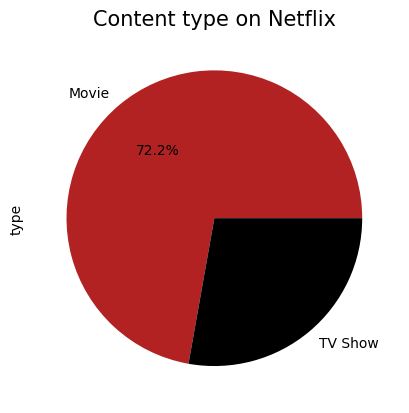

In [265]:

data_final['type'].value_counts().plot(kind= 'pie',autopct = '%1.1f%%', colors = ['firebrick','k'])
plt.title('Content type on Netflix',fontsize=15)
plt.show()


Movie category is seen to have a major share in Netflix in comparison to TV shows.

In [199]:
data_final['title'].nunique()

8807

In [200]:
data_final['title'].value_counts().head(15)

Kahlil Gibran's The Prophet                           700
Holidays                                              504
Movie 43                                              468
The Eddy                                              416
Narcos                                                378
Cloud Atlas                                           360
Sincerely Yours, Dhaka                                330
Olmo & the Seagull                                    300
Kon-Tiki                                              300
HALO Legends                                          288
Creeped Out                                           282
Joseph: King of Dreams                                270
X: Past Is Present                                    264
Michael Bolton's Big, Sexy Valentine's Day Special    246
Animal Crackers                                       224
Name: title, dtype: int64

In [201]:
data_final['director'].nunique()

4994

In [202]:
data_final['director'].value_counts().head(15)

Unknown                50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
Lars von Trier           336
Raja Gosnell             308
Tom Hooper               306
McG                      293
David Dhawan             270
Wilson Yip               260
Don Michael Paul         255
Martin Campbell          248
Noah Baumbach            242
Olivier Assayas          240
Name: director, dtype: int64

In [203]:
data_final['cast'].nunique()

36440

In [204]:
data_final['cast'].value_counts().head(15)

Unknown               2146
Liam Neeson            161
Alfred Molina          160
John Krasinski         139
Salma Hayek            130
Frank Langella         128
Anupam Kher            127
John Rhys-Davies       125
Shah Rukh Khan         108
Naseeruddin Shah       106
Radhika Apte           104
David Attenborough     103
James Franco           100
Quvenzhané Wallis      100
Tara Strong             94
Name: cast, dtype: int64

In [205]:
data_final['country'].nunique()

128

In [277]:
country_counts = data_final['country'].value_counts()
country_counts

United States     59349
India             22814
United Kingdom    12945
Unknown           11897
Japan              8679
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 128, dtype: int64

In [283]:
#duplicated_country_counts = data_final['country'].duplicated()
#data_final[duplicated_country_counts]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday_added,yrdiff
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
5,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
6,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,NaT,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,NaN,NaN,NaN,NaN
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,NaT,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,NaN,NaN,NaN,NaN
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,NaT,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,NaN,NaN,NaN,NaN
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,NaT,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,NaN,NaN,NaN,NaN


## Top content producing countries in Netflix

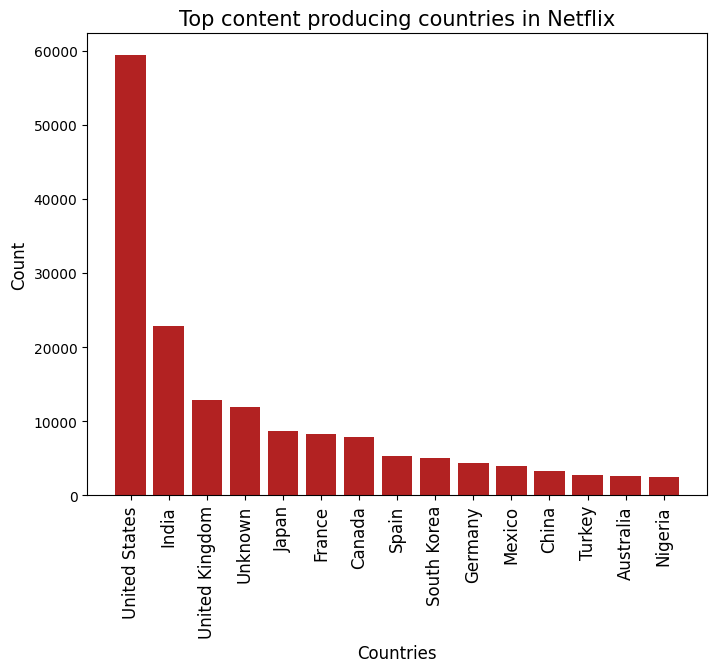

In [273]:
x_bar=country_counts.index
y_bar=country_counts
plt.figure(figsize=(8,6))
plt.title('Top content producing countries in Netflix',fontsize=15)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.bar(x_bar,y_bar,color = 'firebrick')
plt.show()

In [207]:
data_final['date_added'].nunique()

1767

In [208]:
data_final['date_added'].value_counts().head(15)

January 1, 2020      3730
November 1, 2019     2229
July 1, 2021         2219
October 1, 2017      1899
September 1, 2021    1756
March 1, 2018        1752
December 31, 2019    1695
October 1, 2019      1520
October 1, 2018      1419
June 2, 2021         1260
August 1, 2021       1248
January 1, 2021      1216
September 1, 2017    1210
November 1, 2018     1128
January 1, 2018      1079
Name: date_added, dtype: int64

In [209]:
data_final['rating'].nunique()

17

In [210]:
data_final['rating'].value_counts().head(17)

TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [211]:
data_final['duration'].nunique()

220

In [212]:
data_final['duration'].value_counts().head(15)

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
97 min        3624
95 min        3560
96 min        3484
93 min        3480
90 min        3305
105 min       3209
107 min       3103
101 min       3048
102 min       3017
103 min       2985
Name: duration, dtype: int64

In [213]:
data_final['listed_in'].nunique()

42

In [297]:
#data_final['listed_in'].nunique().sort_values(ascending =False).head(20)
#since the code above throwed error kind of going forward with the code below.
listed_in_counts = data_final['listed_in'].value_counts().head(15)
listed_in_counts

Dramas                      29775
International Movies        28211
Comedies                    20829
International TV Shows      12845
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
TV Dramas                    8942
Thrillers                    7107
Romantic Movies              6412
TV Comedies                  4963
Crime TV Shows               4733
Horror Movies                4571
Kids' TV                     4568
Sci-Fi & Fantasy             4037
Name: listed_in, dtype: int64

## Top genre in Netflix

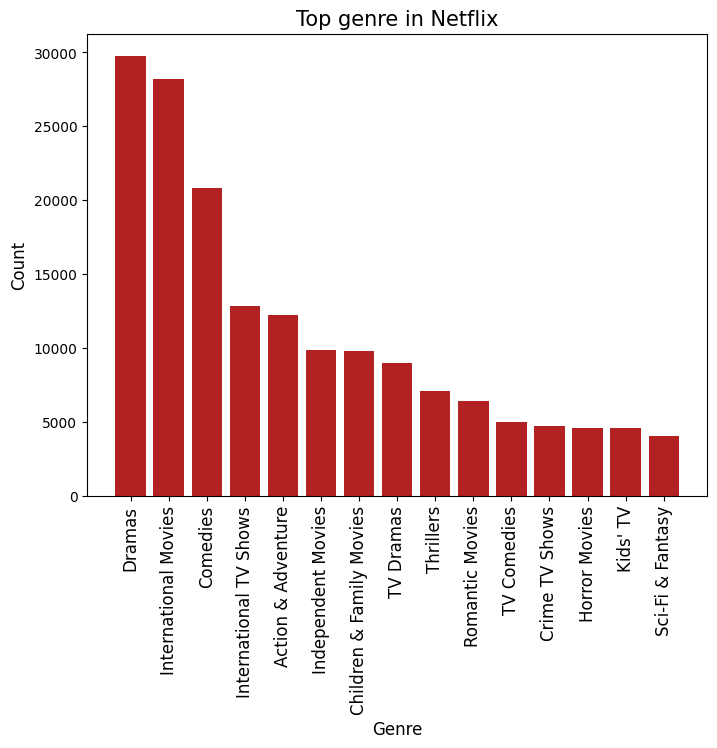

In [271]:
x_bar=listed_in_counts.index
y_bar=listed_in_counts
plt.figure(figsize=(8,6))
plt.title('Top genre in Netflix',fontsize=15)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.bar(x_bar,y_bar,color = 'firebrick')
plt.show()

### The genre in Netflix that tops the list is 'Dramas' followed by International movies,Comedies and International TVshows.

## 2. Comparison of tv shows vs. movies.


### a. Find the number of movies produced in each country and pick the top 10 countries.


In [287]:
data_final.groupby(['country','type'])['title'].nunique().sort_values(ascending =False).head(20)

country         type   
United States   Movie      2751
India           Movie       962
United States   TV Show     938
United Kingdom  Movie       532
Unknown         Movie       440
                TV Show     391
Canada          Movie       319
France          Movie       303
United Kingdom  TV Show     272
Japan           TV Show     199
Germany         Movie       182
Spain           Movie       171
South Korea     TV Show     170
Canada          TV Show     126
Japan           Movie       119
China           Movie       114
Mexico          Movie       111
Egypt           Movie       102
Hong Kong       Movie       100
Australia       Movie        94
Name: title, dtype: int64

### Among the top 15 countries who contribute to Netflix,movies remain the content category except for Japan & South Korea who contribute TVshows.

### b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.

In [298]:
data_final.groupby(['country','type'])['title'].nunique().sort_values(ascending =False).head(30)


country         type   
United States   Movie      2751
India           Movie       962
United States   TV Show     938
United Kingdom  Movie       532
Unknown         Movie       440
                TV Show     391
Canada          Movie       319
France          Movie       303
United Kingdom  TV Show     272
Japan           TV Show     199
Germany         Movie       182
Spain           Movie       171
South Korea     TV Show     170
Canada          TV Show     126
Japan           Movie       119
China           Movie       114
Mexico          Movie       111
Egypt           Movie       102
Hong Kong       Movie       100
Australia       Movie        94
Nigeria         Movie        94
France          TV Show      90
Indonesia       Movie        86
India           TV Show      84
Turkey          Movie        83
Philippines     Movie        80
Belgium         Movie        78
Italy           Movie        75
Argentina       Movie        71
Taiwan          TV Show      70
Name: title, dty

### US tops the top 10 TV show producers in Netflix followed by unknown countries,UK,Japan,Soth Korea,Canada,France and India

##3. What is the best time to launch a TV show?


### a. Find which is the best week to release the Tv-show or the movie.
Do the analysis separately for Tv-shows and Movies.

[creating a new column named 'weekday_added'and grouping by each weekday and counting the total number of movies/ tv shows.]


In [217]:
data_final['date_added'] = pd.to_datetime(data['date_added'])
data_final['year_added'] = data_final['date_added'].dt.year
data_final['month_added'] = data_final['date_added'].dt.month
data_final['weekday_added'] = data_final['date_added'].dt.weekday

In [218]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   show_id        201991 non-null  object        
 1   type           201991 non-null  object        
 2   title          201991 non-null  object        
 3   director       201991 non-null  object        
 4   cast           201991 non-null  object        
 5   country        201991 non-null  object        
 6   date_added     8797 non-null    datetime64[ns]
 7   release_year   201991 non-null  int64         
 8   rating         201924 non-null  object        
 9   duration       201988 non-null  object        
 10  listed_in      201991 non-null  object        
 11  description    201991 non-null  object        
 12  year_added     8797 non-null    float64       
 13  month_added    8797 non-null    float64       
 14  weekday_added  8797 non-null    float64       
dtype

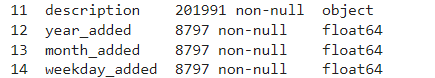

In [219]:
data_final['weekday_added'].shape

(201991,)

In [220]:
data_final['weekday_added'].isna().sum()

193194

Except 8797 values in 201991,remaining are 'NaN' values,i.e., unknown

In [221]:
data_final.head(60)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,5.0
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
5,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
6,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
7,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
8,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
9,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0


In [222]:
data_final.tail(60)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday_added
201931,s8803,Movie,Zodiac,David Fincher,Chloë Sevigny,United States,NaT,2007,R,158 min,Thrillers,"A political cartoonist, a crime reporter and a...",NaN,NaN,NaN
201932,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,NaT,2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g...",NaN,NaN,NaN
201933,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,NaT,2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g...",NaN,NaN,NaN
201934,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,NaT,2018,TV-Y7,2 Seasons,TV Comedies,"While living alone in a spooky town, a young g...",NaN,NaN,NaN
201935,s8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,NaT,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN
201936,s8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,NaT,2009,R,88 min,Horror Movies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN
201937,s8805,Movie,Zombieland,Ruben Fleischer,Woody Harrelson,United States,NaT,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN
201938,s8805,Movie,Zombieland,Ruben Fleischer,Woody Harrelson,United States,NaT,2009,R,88 min,Horror Movies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN
201939,s8805,Movie,Zombieland,Ruben Fleischer,Emma Stone,United States,NaT,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN
201940,s8805,Movie,Zombieland,Ruben Fleischer,Emma Stone,United States,NaT,2009,R,88 min,Horror Movies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN


In [223]:
data_final.groupby(['weekday_added','type'])['title'].nunique().sort_values(ascending =False)

weekday_added  type   
4.0            Movie      189
3.0            Movie      181
1.0            Movie      175
2.0            Movie      170
0.0            Movie      157
5.0            Movie      153
6.0            Movie      141
4.0            TV Show     83
2.0            TV Show     75
3.0            TV Show     74
1.0            TV Show     69
0.0            TV Show     67
5.0            TV Show     67
6.0            TV Show     59
Name: title, dtype: int64

### Undoubtedly weekday 4 seems to be the preferable choice of adding both movies and TV shows,followed by weekday 3 and 1 in case of movie and 2 and 3 in case of TV shows.

### b. Find which is the best month to release the Tv-show or the movie.
Do the analysis separately for Tv-shows and Movies

[created a new column named 'month_added'and grouping by each month and counting
the total number of movies/ tv shows.]

In [224]:
data_final.groupby(['month_added','type'])['title'].nunique().sort_values(ascending =False)

month_added  type   
12.0         Movie      81
1.0          Movie      76
11.0         Movie      76
4.0          Movie      76
10.0         Movie      76
9.0          Movie      75
2.0          Movie      71
6.0          Movie      70
8.0          Movie      69
3.0          Movie      67
5.0          Movie      65
7.0          Movie      62
6.0          TV Show    42
7.0          TV Show    40
10.0         TV Show    38
9.0          TV Show    37
4.0          TV Show    34
3.0          TV Show    34
11.0         TV Show    33
8.0          TV Show    31
5.0          TV Show    31
1.0          TV Show    27
2.0          TV Show    26
12.0         TV Show    26
Name: title, dtype: int64

### In movie category Dec tops the list in case of month added,followed by Jan,April,Sep,Oct and Nov with equal number of movies added in Netflix.

### In case of TV shows,June see the maximum number of TV shows added followed by July and october.

In [225]:
data_final.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'weekday_added'],
      dtype='object')

## 4. Analysis of actors/directors of different types of shows/movies.

a.Identify the top 10 actors who have appeared in most movies or TV shows.



In [226]:
data_final.groupby(['cast'])['title'].nunique().sort_values(ascending = False).head(11)

cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Paresh Rawal         28
Name: title, dtype: int64

### Indian actors Anupam Kher, SRK & Naseeruddin Shah, Om Puri, Akshay Kumar are among the top 10 cast in Neflix.

In [227]:
data_final.groupby(['country','cast'])['title'].nunique().sort_values(ascending = False).head(11)


country         cast            
United States   Unknown             406
Unknown         Unknown             154
United Kingdom  Unknown              96
India           Anupam Kher          40
                Unknown              39
                Shah Rukh Khan       34
France          Unknown              32
Canada          Unknown              31
India           Naseeruddin Shah     31
Japan           Takahiro Sakurai     29
India           Akshay Kumar         29
Name: title, dtype: int64

b. Identify the top 10 directors who have appeared in most movies or TV shows.

In [228]:
data_final.groupby(['director'])['title'].nunique().sort_values(ascending = False).head(11)

director
Unknown                2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Jay Chapman              12
Martin Scorsese          12
Youssef Chahine          12
Name: title, dtype: int64

# 5. Which genre movies are more popular or produced more
 applying word cloud on the genre columns to know which kind of genre is produced

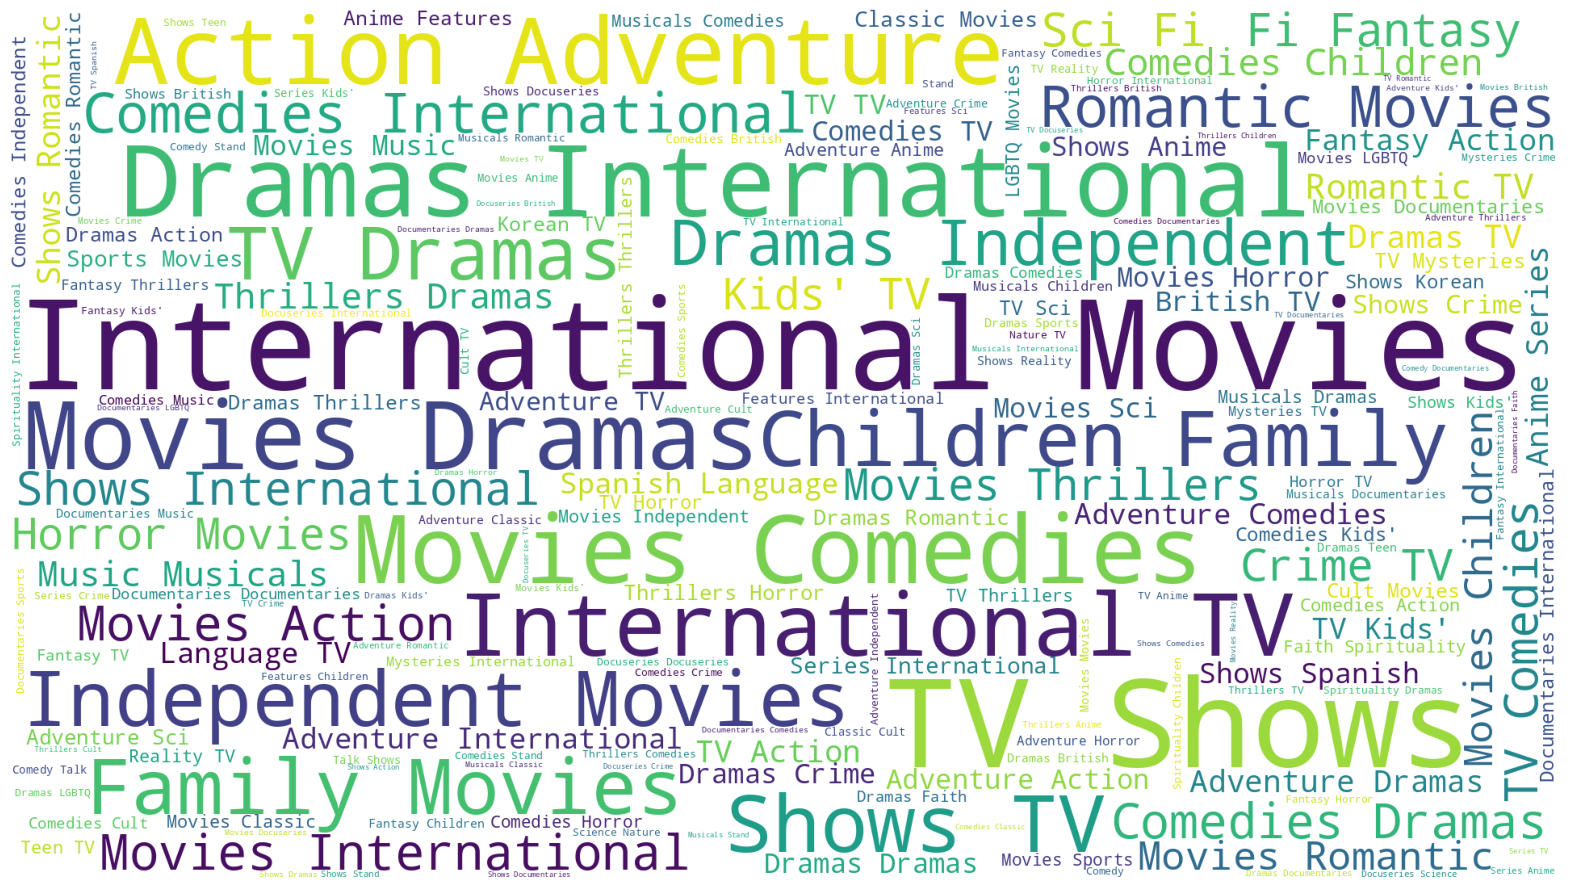

In [229]:
from wordcloud import WordCloud

plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
background_color='white',
width=1920,
height=1080).generate(" ".join(data_final['listed_in']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('genre.png')
plt.show()

In [230]:
data_final['listed_in'].value_counts().head(10)

Dramas                      29775
International Movies        28211
Comedies                    20829
International TV Shows      12845
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
TV Dramas                    8942
Thrillers                    7107
Romantic Movies              6412
Name: listed_in, dtype: int64

# 6. Find after how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)
Hint : We want you to get the difference between the columns having date added
information and release year information and get the mode of difference. This
will give an insight into what will be the better time to add in Netflix

In [231]:
data_final.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'weekday_added'],
      dtype='object')

In [234]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   show_id        201991 non-null  object        
 1   type           201991 non-null  object        
 2   title          201991 non-null  object        
 3   director       201991 non-null  object        
 4   cast           201991 non-null  object        
 5   country        201991 non-null  object        
 6   date_added     8797 non-null    datetime64[ns]
 7   release_year   201991 non-null  int64         
 8   rating         201924 non-null  object        
 9   duration       201988 non-null  object        
 10  listed_in      201991 non-null  object        
 11  description    201991 non-null  object        
 12  year_added     8797 non-null    float64       
 13  month_added    8797 non-null    float64       
 14  weekday_added  8797 non-null    float64       
dtype

In [237]:
data_final['yrdiff'] = data_final['year_added'] - data_final['release_year']
data_final.head(60)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday_added,yrdiff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,5.0,1.0
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
5,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
6,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
7,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
8,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0
9,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0,0.0


In [238]:
data_final.tail(60)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,weekday_added,yrdiff
201931,s8803,Movie,Zodiac,David Fincher,Chloë Sevigny,United States,NaT,2007,R,158 min,Thrillers,"A political cartoonist, a crime reporter and a...",NaN,NaN,NaN,NaN
201932,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,NaT,2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g...",NaN,NaN,NaN,NaN
201933,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,NaT,2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g...",NaN,NaN,NaN,NaN
201934,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,NaT,2018,TV-Y7,2 Seasons,TV Comedies,"While living alone in a spooky town, a young g...",NaN,NaN,NaN,NaN
201935,s8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,NaT,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN,NaN
201936,s8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,NaT,2009,R,88 min,Horror Movies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN,NaN
201937,s8805,Movie,Zombieland,Ruben Fleischer,Woody Harrelson,United States,NaT,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN,NaN
201938,s8805,Movie,Zombieland,Ruben Fleischer,Woody Harrelson,United States,NaT,2009,R,88 min,Horror Movies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN,NaN
201939,s8805,Movie,Zombieland,Ruben Fleischer,Emma Stone,United States,NaT,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN,NaN
201940,s8805,Movie,Zombieland,Ruben Fleischer,Emma Stone,United States,NaT,2009,R,88 min,Horror Movies,Looking to survive in a world taken over by zo...,NaN,NaN,NaN,NaN


In [239]:
data_final['yrdiff'].value_counts()

 0.0     919
-1.0     691
-3.0     489
-4.0     462
-2.0     411
 1.0     400
 10.0    312
 4.0     287
-5.0     280
 16.0    266
 9.0     263
 3.0     257
 11.0    238
 15.0    236
 28.0    212
 2.0     202
 7.0     198
 8.0     194
 5.0     189
 13.0    188
 18.0    181
 6.0     176
 26.0    173
 14.0    162
 20.0    132
 12.0    125
 25.0    124
 17.0    104
 24.0     93
 38.0     82
 33.0     81
 23.0     81
 21.0     80
 19.0     64
 22.0     57
 30.0     48
 27.0     48
 35.0     43
 57.0     40
 34.0     35
 32.0     34
 46.0     30
 29.0     30
 43.0     30
-6.0      12
-10.0     10
-7.0       8
-8.0       8
 31.0      8
-9.0       3
-12.0      1
Name: yrdiff, dtype: int64

### The analysis above shows that the movie/TV show is added to Netflix in tht same year which can be read from yeardiff = 0.

In [235]:
#Tried the above code as I couldn't debug the multiple error thrown by the code below
#data_final['yrdiff'] = data_final['date_added'] - data_final['release_year']
#data_final.tail(60)
#TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

## Business insights

1.Movie category is seen to have a major share in Netflix in comparison to TV shows.

2.Among the top 15 countries who contribute to Netflix, movies remain the content category except for Japan & South Korea who contribute TV shows.

3.US tops the top 10 TV show producers in Netflix followed by unknown countries,UK,Japan,Soth Korea,Canada,France and India.

4.Undoubtedly weekday 4 seems to be the preferable choice of adding both movies and TV shows,followed by weekday 3 and 1 in case of movie and 2 and 3 in case of TV shows.

5.In movie category Dec tops the list in case of month added,followed by Jan,April,Sep,Oct and Nov with equal number of movies added in Netflix.

6.In case of TV shows,June see the maximum number of TV shows added followed by July and october.

7.Indian actors Anupam Kher, SRK & Naseeruddin Shah, Om Puri, Akshay Kumar are among the top 10 cast in Neflix.

8.The genre in Netflix that tops the list is 'Dramas' followed by International movies,Comedies and International TVshows.

9.The analysis above shows that the movie/TV show is added to Netflix in tht same year which can be read from yeardiff = 0.

## Recommendations

1.On the surface level movie category seems to be the best option to invest money in looking at the share of the same in Netflix.An in-depth analysis of categories will reveal the best option of investment.

2.TV shows seems to be the best option for producers of Japan & South Korea compared to movies as the content of TVshows are more in number than movies in Netflix from the respective countries.

3.Netflix should make intelligent choice while choosing between movies or TVshows to showcase in the platform looking at the growth rate of both category country-wise and should not go with a genaralized decision to opt any one category alone across countries.

4.Netflix can choose to go with the weekday to add content that tops the list of date added-weekday 4 & 3 in case of movies and 2 & 3 in case of TVshows.

5.Netflix can choose to go with the current top month in which most of the Movie content is added i.e.,Dec. Or else can go for experimentations with the remaining months.

6.In case of TVshows June followed by July & October are the preferred months of adding content.

7.Netflix can choose to add the content of Top cast in case of movies and TVshows country-wise. As per the current analysis Anupam Kher, SRK and Nazeeruddin shah seems to be the top cast.

8.Dramas followed by International movies,,Comedies and International TVshows are the top genres that Netflix can choose to give a green signal as they tops the genre list.

9.The above analysis shows that it is okay to add the content in the same year of release as the same trend is visible as per the current analysis.